<a href="https://colab.research.google.com/github/sunxueliang96/WF-FrameWork/blob/master/Data%20Augmented/multiple_technologies/analysis%26result_knn_Closed_World_NoDef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
#cd /content/drive/'My Drive'/datasets/no_paded/open_world/walkiebatch


In [0]:
#datatype_Close = False   #Flase is Open_World, True is Closed World.

In [3]:
cd /content/drive/'My Drive'/datasets/no_paded/close_world/knn

/content/drive/My Drive/datasets/no_paded/close_world/knn


In [0]:
datatype_Close = True   #Flase is Open_World, True is Closed World.

In [5]:
ls

X_knnbatch.pkl  y_knnbatch.pkl


In [6]:
import numpy as np
import pickle

print('loading data...')
with open('X_knnbatch.pkl','rb') as handle:
  X = np.array(pickle.load(handle))
with open('y_knnbatch.pkl','rb') as handle:
  y = np.array(pickle.load(handle))
print('the shape of X',X.shape)
print('the shape of y',y.shape)


loading data...
the shape of X (9100,)
the shape of y (9100,)


In [0]:
import math 
import random
def fun_noise(X,y,PERCENT_NOISE,TIMES_NOISE): 
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()
    #print("{} samples has beed add to X_train, {}% of noise for each sample".format(math.ceil(len(X)*TIMES_NOISE),PERCENT_NOISE))
    k=0
    for i in range(math.ceil(len(X)*TIMES_NOISE)): #ADDING NOISE from here 
        if(i in list(range(0,math.ceil(len(X)*TIMES_NOISE),math.ceil(len(X)*TIMES_NOISE)//10))):
            print("{}0% data has been dealed".format(k),flush = True)
            k +=1
        while(True):
            p = random.choice(range(len(X)))
            if(y[p]!=-1):
                break
            else:
                pass
        X_new = X[p].copy()
        y_new = y[p]
        for n in range(math.ceil(PERCENT_NOISE*len(X_new)/100)):#dealing X_new
            noise = random.choice([1,-1])       #noise could only be 1 or -1
            pos = random.choice(range(len(X_new)))  #position belong to (0,len(sequence))
            X_new.insert(pos,noise)
            #print('insert {} at position {} in sequence {} now len of sequence is {}, the tag of sequence is {}'.format(noise,pos,p,len(X_new),y_new)) #for test
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
def fun_delete(X,y,PERCENT_DELETE,TIMES_DELETE): 
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()
    k = 0
    for i in range(math.ceil(len(X)*TIMES_DELETE)): #RANDOM DELETE from here
        if(i in list(range(0,math.ceil(len(X)*TIMES_DELETE),math.ceil(len(X)*TIMES_DELETE)//10))):
            print("{}0% data has been dealed".format(k),flush = True)
            k +=1
        while(True):
            p = random.choice(range(len(X)))
            if(y[p]!=-1):
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        y_new = y[p]
        for n in range(math.ceil(PERCENT_DELETE*len(X_new)/100)):#dealing X_new
            pos = random.choice(range(len(X_new)))  #position belong to (0,len(sequence))
            del X_new[pos]
            #print('insert {} at position {} in sequence {} now len of sequence is {}'.format(noise,pos,p,len(X_new))) #for test
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
def fun_shuffle(X,y,PERCENT_CHANGED,TIMES_SHUFFLE): 
    X = list(X)
    y = list(y)
    #X_sum = X.copy()
    #y_sum = y.copy()
    X_sum = []
    y_sum = []
    k=0
    for i in range(math.ceil(len(X)*TIMES_SHUFFLE)):             #LOCALLY CHANGE from here
        if(i in list(range(0,math.ceil(len(X)*TIMES_SHUFFLE),math.ceil(len(X)*TIMES_SHUFFLE)//10))):
            print("{}0% data has been dealed".format(k),flush = True)
            k +=1
        while(True):
            p = random.choice(range(len(X)))
            if(y[p]!=-1):
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        y_new = y[p]
        length = math.ceil(PERCENT_CHANGED*len(X_new)/100)
        start = random.choice(range(len(X_new)-length))
        temp = X_new[start:start+length]
        random.shuffle(temp)
        X_new[start:start+length] = temp

        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
def fun_transplant(X,y,PERCENT_TRANSPLANT,NB_TIMES):        #Magnificate dataset by adding noising randomly
    global datatype_Close
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()
    #print("{} samples has beed add to X_train, {}% of noise for each sample".format(math.ceil(len(X)*NB_TIMES),PERCENT_TRANSPLANT))
    k=0
    print('When the process freezing, please check that datatype_Close has been set correctly')
    for i in range(math.ceil(len(X)*NB_TIMES)):
        if(i in list(range(0,math.ceil(len(X)*NB_TIMES),math.ceil(len(X)*NB_TIMES)//10))):
            print("{}0% data has been dealed".format(k),flush = True)
            k +=1
        #print(datatype_Close)    
        while(datatype_Close):                               # target pos p (sensitive website), pos q (non-sensitive website)
            p = random.choice(range(len(X)))
            q = random.choice(range(len(X)))
            if(p != q):                           # Closed_World
                break
            else:
                #print('-1 detected')
                pass
        while(not datatype_Close):                               # target pos p (sensitive website), pos q (non-sensitive website)
            p = random.choice(range(len(X)))
            q = random.choice(range(len(X)))
            if(y[p]!=-1 and y[q]==-1):               # open_world
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        target = X[q].copy()
        y_new = y[p]

        length_X = math.ceil(PERCENT_TRANSPLANT*len(X_new)/100)
        length_target =  math.ceil(PERCENT_TRANSPLANT*len(target)/100)
        start_X = random.choice(range(len(X_new)-length_X))
        start_target = random.choice(range(len(target)-length_target))
        temp = target[start_target:start_target+length_target]
        X_new[start_X:start_X+length_X] = temp
     
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum

    '''
def fun_mixup(X,y,TIMES_mixup):
    global datatype_Close
    X = list(X)
    y = list(y)
    X_sum = []
    y_sum = []
    #X_sum = X.copy()
    #y_sum = y.copy()
    #print("{} samples has beed add to X_train, {}% of noise for each sample".format(math.ceil(len(X)*NB_TIMES),PERCENT_TRANSPLANT))
    for i in range(math.ceil(len(X)*NB_TIMES)):  
        while(datatype_Close):                               # target pos p (sensitive website), pos q (non-sensitive website)
            p = random.choice(range(len(X)))
            q = random.choice(range(len(X)))
            if(p != q):                           # Closed_World
                break
            else:
                #print('-1 detected')
                pass
        while(not datatype_Close):                               # target pos p (sensitive website), pos q (non-sensitive website)
            p = random.choice(range(len(X)))
            q = random.choice(range(len(X)))
            if(y[p]!=-1 and y[q]==-1):               # open_world
                break
            else:
                #print('-1 detected')
                pass
        X_new = X[p].copy()
        target = X[q].copy()
        y_new = y[p]

        length_X = math.ceil(PERCENT_TRANSPLANT*len(X_new)/100)
        length_target =  math.ceil(PERCENT_TRANSPLANT*len(target)/100)
        start_X = random.choice(range(len(X_new)-length_X))
        start_target = random.choice(range(len(target)-length_target))
        temp = target[start_target:start_target+length_target]
        X_new[start_X:start_X+length_X] = temp
     
        X_sum.append(X_new)
        y_sum.append(y_new)
    return X_sum,y_sum
'''
def random_launch(X,y,NB_tech):
    X = list(X)
    y = list(y)
    #X_sum = X.copy()
    #y_sum = y.copy()
    X_sum = []
    y_sum = []
    if (NB_tech==0):
        print('adding noise...')
        X_new,y_new = fun_noise(X,y,PERCENT_NOISE=40,TIMES_NOISE=3)
        X_sum.extend(X_new)
        y_sum.extend(y_new)
    elif (NB_tech==1):
        print('deleting...')
        X_new,y_new = fun_delete(X,y,PERCENT_DELETE=40,TIMES_DELETE=3)
        X_sum.extend(X_new)
        y_sum.extend(y_new)
    elif (NB_tech==2):
        print('shuffling...')
        X_new,y_new = fun_shuffle(X,y,PERCENT_CHANGED=40,TIMES_SHUFFLE=3)
        X_sum.extend(X_new)
        y_sum.extend(y_new)
    elif (NB_tech==3):
        print('transplanting...')
        X_new,y_new = fun_transplant(X,y,PERCENT_TRANSPLANT=40,NB_TIMES=3)
        X_sum.extend(X_new)
        y_sum.extend(y_new)
    return np.array(X_sum),np.array(y_sum)                        #return two array of X, y 

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing import sequence
from collections import Counter
#CLASSES_KNN = 101########################################################################################################################################################################################################
#CLASSES_WAKIE = 100########################################################################################################################################################################################################
MAXLEN_KNN = 2000
MAXLEN_WAKIE =5000

maxlen = 2000
NB_CLASSES = 0

def choose():
    global maxlen,NB_CLASSES
    print('if padding, the max of length of seq is {}'.format(maxlen))
    NB_CLASSES = len(Counter(y).keys())
    print('number of classes is {}'.format(NB_CLASSES))

choose()################################################################################################################################################################################################################

print('Average sequence length: {}'.format(np.mean(list(map(len, X)), dtype=int)))


Using TensorFlow backend.


if padding, the max of length of seq is 2000
number of classes is 100
Average sequence length: 1816


In [0]:
#FCN
from keras import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adamax
def DNN(input_shape,classes):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model
def run_DNN(X_train,y_train,X_test,y_test,X_temp,y_temp,BATCH_SIZE,history):
    for i in range(NB_EPOCHS):
        if (i<=NB_EPOCHS/5):
            log = model_DNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)
        elif (NB_EPOCHS/5<i and i%2==1 and i<(NB_EPOCHS*4/5)):
            log = model_DNN.fit(X_temp,y_temp,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)
        elif (NB_EPOCHS/5<i and i%2==0 and i<(NB_EPOCHS*4/5)):
            log = model_DNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)
        else:
            log = model_DNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)

In [0]:
#CNN
from keras import Input,Model,Sequential
from keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.advanced_activations import ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adamax
def CNN(input_shape, classes):
    model = Sequential()
    #Block1
    filter_num = ['None',32,64,128,256]
    kernel_size = ['None',8,8,8,8]
    conv_stride_size = ['None',1,1,1,1]
    pool_stride_size = ['None',4,4,4,4]
    pool_size = ['None',8,8,8,8]

    model.add(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1], input_shape=(input_shape,1),
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv1'))
    model.add(BatchNormalization(axis=-1))
    model.add(ELU(alpha=1.0, name='block1_adv_act1'))
    model.add(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1],
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv2'))
    model.add(BatchNormalization(axis=-1))
    model.add(ELU(alpha=1.0, name='block1_adv_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[1], strides=pool_stride_size[1],
                            padding='same', name='block1_pool'))
    model.add(Dropout(0.1, name='block1_dropout'))

    model.add(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block2_act1'))

    model.add(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block2_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[2], strides=pool_stride_size[3],
                            padding='same', name='block2_pool'))
    model.add(Dropout(0.1, name='block2_dropout'))

    model.add(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block3_act1'))
    model.add(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block3_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[3], strides=pool_stride_size[3],
                            padding='same', name='block3_pool'))
    model.add(Dropout(0.1, name='block3_dropout'))

    model.add(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block4_act1'))
    model.add(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block4_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[4], strides=pool_stride_size[4],
                            padding='same', name='block4_pool'))
    model.add(Dropout(0.1, name='block4_dropout'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='fc1_act'))

    model.add(Dropout(0.7, name='fc1_dropout'))

    model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='fc2_act'))

    model.add(Dropout(0.5, name='fc2_dropout'))

    model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    model.add(Activation('softmax', name="softmax"))
    return model
def run_CNN(X_train,y_train,X_test,y_test,X_temp,y_temp,BATCH_SIZE,history):
    for i in range(NB_EPOCHS):
        if (i<=NB_EPOCHS/5):
            log = model_CNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)
        elif (NB_EPOCHS/5<i and i%2==1 and i<(NB_EPOCHS*4/5)):
            log = model_CNN.fit(X_temp,y_temp,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)
        elif (NB_EPOCHS/5<i and i%2==0 and i<(NB_EPOCHS*4/5)):
            log = model_CNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)
        else:
            log = model_CNN.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=1,validation_data=(X_test,y_test),verbose=1)
            history.recorder(log)

In [0]:
import keras
from keras import backend as K

def precision(y_true, y_pred):
    # Calculates the precision
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    # Calculates the recall
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    # Calculates the F score, the weighted harmonic mean of precision and recall.
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
 
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def fmeasure(y_true, y_pred):
    # Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)

In [0]:
class my_history():
    def __init__(self):
        self.history = {'loss':[],'acc':[],'top_k_categorical_accuracy':[],'precision':[],'recall':[],'fmeasure':[],'val_loss':[],'val_acc':[],'val_top_k_categorical_accuracy':[],'val_precision':[],'val_recall':[],'val_fmeasure':[]}
    def recorder(self,history):
        self.history['loss'].append(history.history['loss'][0])
        self.history['acc'].append(history.history['acc'][0])
        self.history['top_k_categorical_accuracy'].append(history.history['top_k_categorical_accuracy'][0])
        self.history['precision'].append(history.history['precision'][0])
        self.history['recall'].append(history.history['recall'][0])
        self.history['fmeasure'].append(history.history['fmeasure'][0])
        self.history['val_loss'].append(history.history['val_loss'][0])
        self.history['val_acc'].append(history.history['val_acc'][0])
        self.history['val_top_k_categorical_accuracy'].append(history.history['val_top_k_categorical_accuracy'][0])
        self.history['val_precision'].append(history.history['val_precision'][0])
        self.history['val_recall'].append(history.history['val_recall'][0])
        self.history['val_fmeasure'].append(history.history['val_fmeasure'][0])

In [13]:
import gc
VALIDATION_SPLIT = 0.3

X_train_saved,X_test_saved,y_train_saved,y_test_saved = train_test_split(X,y,test_size=VALIDATION_SPLIT)
del X
del y
print('launching  garbage collect .....')
gc.collect()
print('garbage collected .....')



launching  garbage collect .....
garbage collected .....


In [14]:
#DNN               ############# test for noise adding  , function :: creat_data############

BATCH_SIZE = 64
NB_EPOCHS = 50
NB_TECHS = 4
OPTIMIZER = Adamax()


history_DNN = []
for i in range(NB_TECHS):
    his = my_history()
    X_temp,y_temp = random_launch(X_train_saved,y_train_saved,i)
    X_temp = sequence.pad_sequences(X_temp, maxlen=maxlen,padding='post',truncating='post')
    y_temp = np_utils.to_categorical(y_temp, NB_CLASSES)
    X_train = sequence.pad_sequences(X_train_saved, maxlen=maxlen,padding='post',truncating='post')
    y_train = np_utils.to_categorical(y_train_saved, NB_CLASSES)
    X_test = sequence.pad_sequences(X_test_saved, maxlen=maxlen,padding='post',truncating='post')
    y_test = np_utils.to_categorical(y_test_saved, NB_CLASSES)
    model_DNN = DNN(maxlen,NB_CLASSES)
    #model_DNN.summary()
    model_DNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy','top_k_categorical_accuracy', precision, recall, fmeasure])
    run_DNN(X_train,y_train,X_test,y_test,X_temp,y_temp,BATCH_SIZE,history = his)
    history_DNN.append(his)


print('the shape of x_train',X_train.shape)
print('the shape of y_train',y_train.shape)
print('the shape of x_test',X_test.shape)
print('the shape of y_test',y_test.shape)

print('base_line_now#######################################################################################################################################################################################################')
model_DNN_org = DNN(maxlen,NB_CLASSES)
model_DNN_org.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy','top_k_categorical_accuracy', precision, recall, fmeasure])
history_DNN_org = model_DNN_org.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=50,validation_data=(X_test,y_test),verbose=1)

adding noise...
00% data has been dealed
10% data has been dealed
20% data has been dealed
30% data has been dealed
40% data has been dealed
50% data has been dealed
60% data has been dealed
70% data has been dealed
80% data has been dealed
90% data has been dealed




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6370 samples, validate on 2730 samples
Epoch 1/1





6370/6370 [==============================] - 4s 706us/step - loss: 4.2961 - acc: 0.0259 - top_k_categorical_accuracy: 0.1152 - precision: 0.0000e+00 - recall: 0.0000e+00 - fmeasure: 0.0000e+00 - val_loss: 3.7993 - val_acc: 0.0758 - val_top_k_categorical_accuracy: 0.2762 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_fmeasure: 0.0000e+00
Train on 6370 samples, validate on 2730 samples
Epoch 1/1
6370/6370 [==============================] -

In [15]:
#CNN               ############# test for noise adding  , function :: creat_data############
'''
BATCH_SIZE = 64
NB_EPOCHS = 50
NB_TECHS = 4
OPTIMIZER = Adamax()
model_CNN = CNN(maxlen,NB_CLASSES)
model_CNN.summary()
model_CNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy','top_k_categorical_accuracy', precision, recall, fmeasure])

history_CNN = []
for i in range(NB_TECHS):
    his = my_history()
    X_temp,y_temp = random_launch(X_train_saved,y_train_saved,i)
    X_temp = sequence.pad_sequences(X_temp, maxlen=maxlen,padding='post',truncating='post')
    X_temp = X_temp[:,:,np.newaxis]
    y_temp = np_utils.to_categorical(y_temp, NB_CLASSES)
    X_train = sequence.pad_sequences(X_train_saved, maxlen=maxlen,padding='post',truncating='post')
    X_train = X_train[:,:,np.newaxis]
    y_train = np_utils.to_categorical(y_train_saved, NB_CLASSES)
    X_test = sequence.pad_sequences(X_test_saved, maxlen=maxlen,padding='post',truncating='post')
    X_test = X_test[:,:,np.newaxis]
    y_test = np_utils.to_categorical(y_test_saved, NB_CLASSES)
    run_CNN(X_train,y_train,X_test,y_test,X_temp,y_temp,BATCH_SIZE,history = his)
    history_CNN.append(his)

print('the shape of x_train',X_train.shape)
print('the shape of y_train',y_train.shape)
print('the shape of x_test',X_test.shape)
print('the shape of y_test',y_test.shape)

print('base_line_now#######################################################################################################################################################################################################')
model_CNN_org = CNN(maxlen,NB_CLASSES)
model_CNN_org.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy','top_k_categorical_accuracy', precision, recall, fmeasure])
history_CNN_org = model_CNN_org.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=50,validation_data=(X_test,y_test),verbose=1)

'''


"\nBATCH_SIZE = 64\nNB_EPOCHS = 50\nNB_TECHS = 4\nOPTIMIZER = Adamax()\nmodel_CNN = CNN(maxlen,NB_CLASSES)\nmodel_CNN.summary()\nmodel_CNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy','top_k_categorical_accuracy', precision, recall, fmeasure])\n\nhistory_CNN = []\nfor i in range(NB_TECHS):\n    his = my_history()\n    X_temp,y_temp = random_launch(X_train_saved,y_train_saved,i)\n    X_temp = sequence.pad_sequences(X_temp, maxlen=maxlen,padding='post',truncating='post')\n    X_temp = X_temp[:,:,np.newaxis]\n    y_temp = np_utils.to_categorical(y_temp, NB_CLASSES)\n    X_train = sequence.pad_sequences(X_train_saved, maxlen=maxlen,padding='post',truncating='post')\n    X_train = X_train[:,:,np.newaxis]\n    y_train = np_utils.to_categorical(y_train_saved, NB_CLASSES)\n    X_test = sequence.pad_sequences(X_test_saved, maxlen=maxlen,padding='post',truncating='post')\n    X_test = X_test[:,:,np.newaxis]\n    y_test = np_utils.to_categorical(y_test_saved, NB

In [0]:
import matplotlib.pylab as plt  

LIST_label = ['noise','delete','shuffle','transplant']
LIST_index = ['val_loss','val_acc','val_top_k_categorical_accuracy','val_precision','val_recall','val_fmeasure']
NB_index = len(LIST_index)

def my_plot(history_org,history_after): #
    fig,axs = plt.subplots(NB_index,1,figsize=(30,100))
    for j,index in zip(range(NB_index),LIST_index):  #for each index like: loss....acc ....top5
        alpha = 1
        axs[j].plot(range(NB_EPOCHS),history_org.history[index],label='before')
        #axs[j].annotate('before'+str(round(sum(history_org.history[index][-6:-1])/5,2)),(NB_EPOCHS,sum(history_org.history[index][-6:-1])/5),xytext=(NB_EPOCHS*alpha,sum(history_org.history[index][-6:-1])*alpha/5),arrowprops=dict(arrowstyle='->'))
        before = round(sum(history_org.history[index][-6:-1])/5,2)
        for i in range(NB_TECHS): #for each techs i.e. each line with different color
            alpha = alpha*0.6
            axs[j].plot(range(NB_EPOCHS),history_after[i].history[index],label=LIST_label[i])
            #axs[j].annotate(LIST_label[i]+str(round(sum(history_after[i].history[index][-6:-1])/5,2)),(NB_EPOCHS,sum(history_after[i].history[index][-6:-1])/5),xytext=(NB_EPOCHS*alpha,sum(history_after[i].history[index][-6:-1])*alpha/5),arrowprops=dict(arrowstyle='->'))
            after = round(sum(history_after[i].history[index][-6:-1])/5,2)
            t = LIST_label[i] + str(round((after - before)/before,3)) + '% improved'
            h_max = max(history_after[i].history[index])
            axs[j].text(NB_EPOCHS, h_max*alpha, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
        #axs[j].text(NB_EPOCHS, history_DNN_org.history['val_precision'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
        axs[j].set_title(LIST_index[j])
        axs[j].legend()

    plt.show()


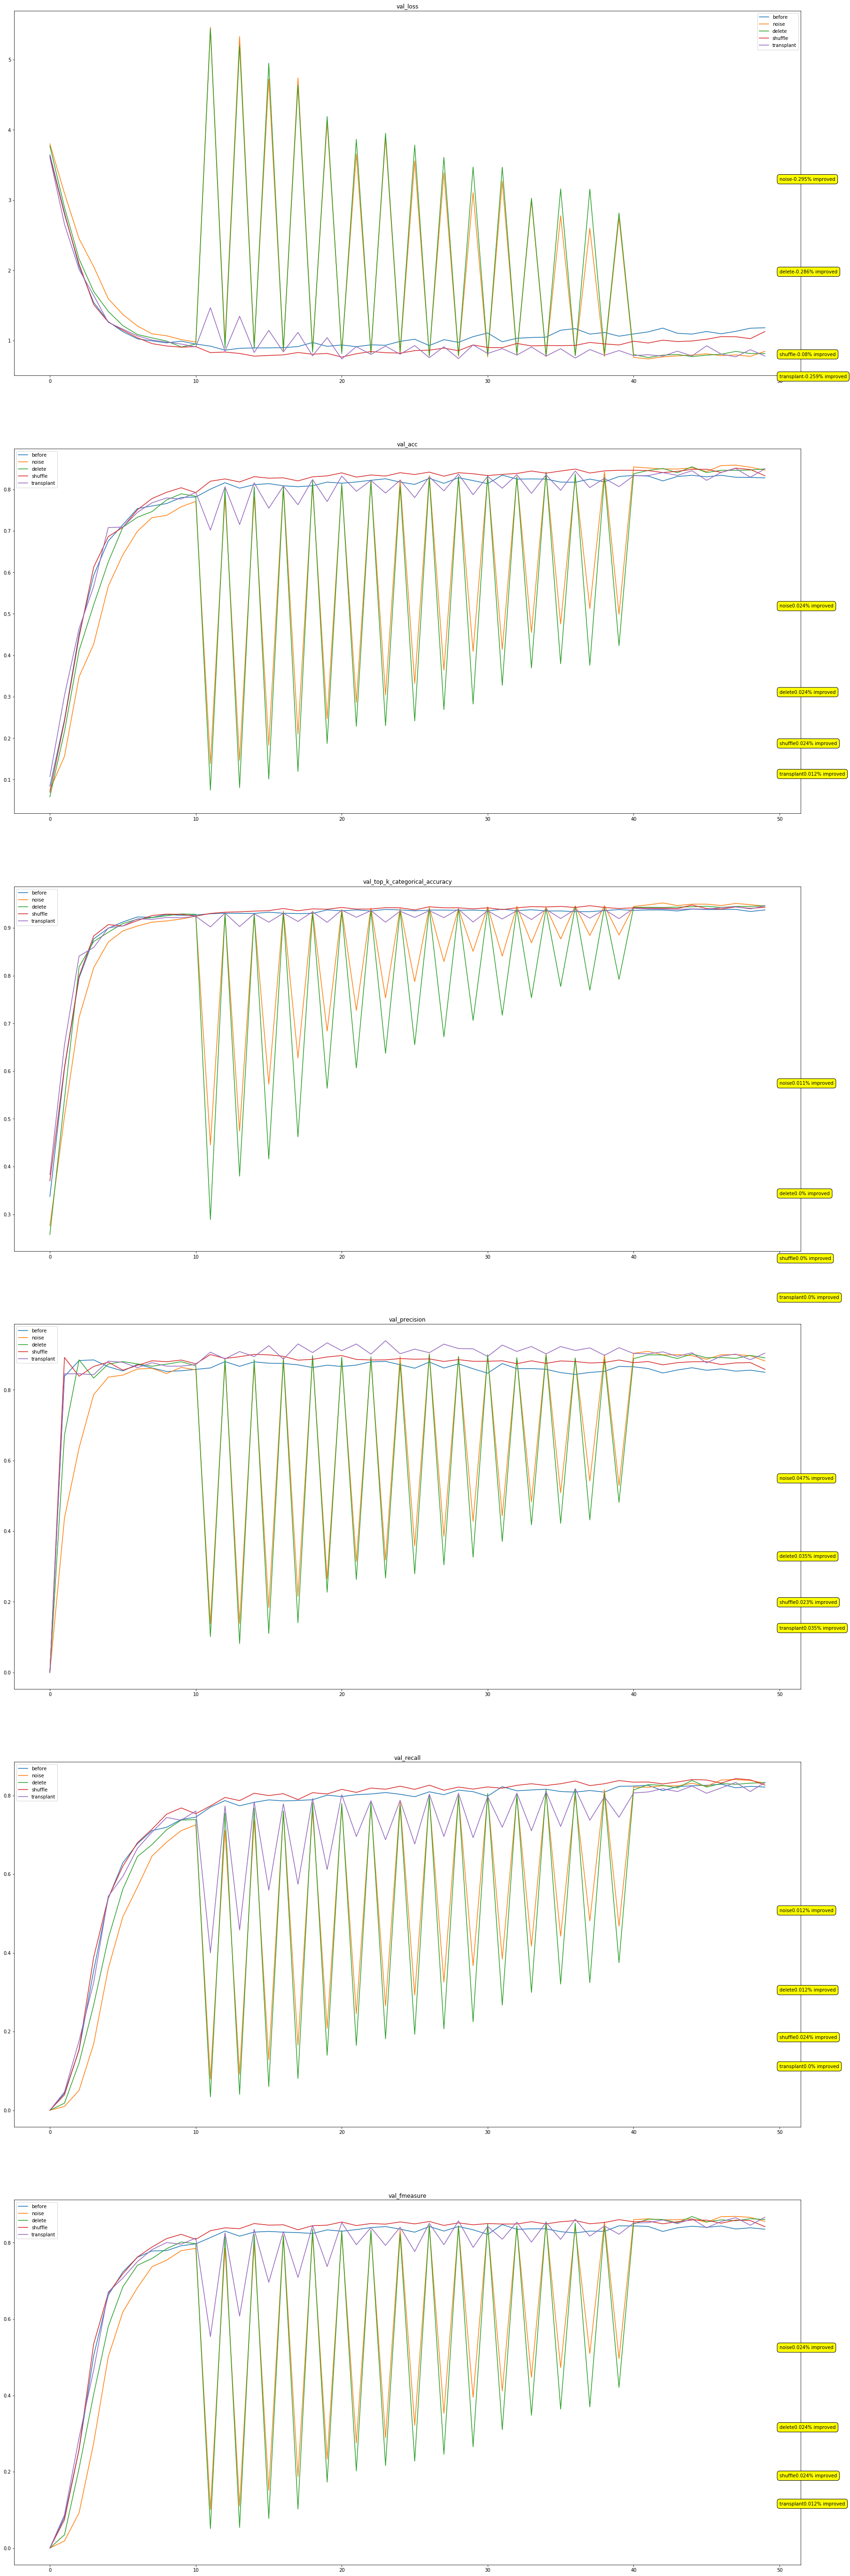

In [33]:
my_plot(history_DNN_org,history_DNN)

In [0]:
my_plot(history_CNN_org,history_CNN)

In [0]:
 
''''
fig,axs = plt.subplots(6,1,figsize=(30,80))
axs[0].plot(range(NB_EPOCHS),history_DNN_org.history['val_loss'],label='before')
axs[0].plot(range(NB_EPOCHS),history_DNN_val_loss,label='after')
for i in range(NB_EPOCHS):
    if(history_DNN_org.history['val_loss'][i]<=history_DNN_val_loss[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[0].annotate(round(history_DNN_org.history['val_loss'][i],3),(i,history_DNN_org.history['val_loss'][i]),xytext=(i,history_DNN_org.history['val_loss'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[0].annotate(round(history_DNN_val_loss[i],3),(i,history_DNN_val_loss[i]),xytext=(i,history_DNN_val_loss[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_DNN_org.history['val_loss'][-6:-1])
avg_aft = sum(history_DNN_val_loss[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[0].text(NB_EPOCHS, history_DNN_org.history['val_loss'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))


axs[1].plot(range(NB_EPOCHS),history_DNN_org.history['val_acc'],label='before')
axs[1].plot(range(NB_EPOCHS),history_DNN_val_acc,label='after')
for i in range(NB_EPOCHS):
    if(history_DNN_org.history['val_acc'][i]<=history_DNN_val_acc[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[1].annotate(round(history_DNN_org.history['val_acc'][i],3),(i,history_DNN_org.history['val_acc'][i]),xytext=(i,history_DNN_org.history['val_acc'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[1].annotate(round(history_DNN_val_acc[i],3),(i,history_DNN_val_acc[i]),xytext=(i,history_DNN_val_acc[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_DNN_org.history['val_acc'][-6:-1])
avg_aft = sum(history_DNN_val_acc[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[1].text(NB_EPOCHS, history_DNN_org.history['val_acc'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[1].set_title('val_acc')

axs[2].plot(range(NB_EPOCHS),history_DNN_org.history['val_precision'],label='before')
axs[2].plot(range(NB_EPOCHS),history_DNN_val_precision,label='after')
for i in range(NB_EPOCHS):
    if(history_DNN_org.history['val_precision'][i]<=history_DNN_val_precision[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[2].annotate(round(history_DNN_org.history['val_precision'][i],3),(i,history_DNN_org.history['val_precision'][i]),xytext=(i,history_DNN_org.history['val_precision'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[2].annotate(round(history_DNN_val_precision[i],3),(i,history_DNN_val_precision[i]),xytext=(i,history_DNN_val_precision[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_DNN_org.history['val_precision'][-6:-1])
avg_aft = sum(history_DNN_val_precision[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[2].text(NB_EPOCHS, history_DNN_org.history['val_precision'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[2].set_title('val_precision')

axs[3].plot(range(NB_EPOCHS),history_DNN_org.history['val_recall'],label='before')
axs[3].plot(range(NB_EPOCHS),history_DNN_val_recall,label='after')
for i in range(NB_EPOCHS):
    if(history_DNN_org.history['val_recall'][i]<=history_DNN_val_recall[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[3].annotate(round(history_DNN_org.history['val_recall'][i],3),(i,history_DNN_org.history['val_recall'][i]),xytext=(i,history_DNN_org.history['val_recall'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[3].annotate(round(history_DNN_val_recall[i],3),(i,history_DNN_val_recall[i]),xytext=(i,history_DNN_val_recall[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_DNN_org.history['val_recall'][-6:-1])
avg_aft = sum(history_DNN_val_recall[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[3].text(NB_EPOCHS, history_DNN_org.history['val_recall'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[3].set_title('val_recall')

axs[4].plot(range(NB_EPOCHS),history_DNN_org.history['val_fmeasure'],label='before')
axs[4].plot(range(NB_EPOCHS),history_DNN_val_fmeasure,label='after')
for i in range(NB_EPOCHS):
    if(history_DNN_org.history['val_fmeasure'][i]<=history_DNN_val_fmeasure[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[4].annotate(round(history_DNN_org.history['val_fmeasure'][i],3),(i,history_DNN_org.history['val_fmeasure'][i]),xytext=(i,history_DNN_org.history['val_fmeasure'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[4].annotate(round(history_DNN_val_fmeasure[i],3),(i,history_DNN_val_fmeasure[i]),xytext=(i,history_DNN_val_fmeasure[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_DNN_org.history['val_fmeasure'][-6:-1])
avg_aft = sum(history_DNN_val_fmeasure[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[4].text(NB_EPOCHS, history_DNN_org.history['val_fmeasure'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[4].set_title('val_fmeasure')

axs[5].plot(range(NB_EPOCHS),history_DNN_org.history['val_top_k_categorical_accuracy'],label='before')
axs[5].plot(range(NB_EPOCHS),history_DNN_val_acc5,label='after')
for i in range(NB_EPOCHS):
    if(history_DNN_org.history['val_top_k_categorical_accuracy'][i]<=history_DNN_val_acc5[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[5].annotate(round(history_DNN_org.history['val_top_k_categorical_accuracy'][i],3),(i,history_DNN_org.history['val_top_k_categorical_accuracy'][i]),xytext=(i,history_DNN_org.history['val_top_k_categorical_accuracy'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[5].annotate(round(history_DNN_val_acc5[i],3),(i,history_DNN_val_acc5[i]),xytext=(i,history_DNN_val_acc5[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_DNN_org.history['val_top_k_categorical_accuracy'][-6:-1])
avg_aft = sum(history_DNN_val_acc5[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[0].text(NB_EPOCHS, history_DNN_org.history['val_loss'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()
'''

In [0]:
import matplotlib.pylab as plt
'''

fig,axs = plt.subplots(5,1,figsize=(30,80))
axs[0].plot(range(NB_EPOCHS),history_CNN_org.history['val_loss'],label='before')
axs[0].plot(range(NB_EPOCHS),history_CNN_val_loss,label='after')
for i in range(NB_EPOCHS):
    if(history_CNN_org.history['val_loss'][i]<=history_CNN_val_loss[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[0].annotate(round(history_CNN_org.history['val_loss'][i],3),(i,history_CNN_org.history['val_loss'][i]),xytext=(i,history_CNN_org.history['val_loss'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[0].annotate(round(history_CNN_val_loss[i],3),(i,history_CNN_val_loss[i]),xytext=(i,history_CNN_val_loss[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_CNN_org.history['val_loss'][-6:-1])
avg_aft = sum(history_CNN_val_loss[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[0].text(NB_EPOCHS, history_CNN_org.history['val_loss'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))


axs[1].plot(range(NB_EPOCHS),history_CNN_org.history['val_acc'],label='before')
axs[1].plot(range(NB_EPOCHS),history_CNN_val_acc,label='after')
for i in range(NB_EPOCHS):
    if(history_CNN_org.history['val_acc'][i]<=history_CNN_val_acc[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[1].annotate(round(history_CNN_org.history['val_acc'][i],3),(i,history_CNN_org.history['val_acc'][i]),xytext=(i,history_CNN_org.history['val_acc'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[1].annotate(round(history_CNN_val_acc[i],3),(i,history_CNN_val_acc[i]),xytext=(i,history_CNN_val_acc[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_CNN_org.history['val_acc'][-6:-1])
avg_aft = sum(history_CNN_val_acc[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[1].text(NB_EPOCHS, history_CNN_org.history['val_acc'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[1].set_title('val_acc')

axs[2].plot(range(NB_EPOCHS),history_CNN_org.history['val_precision'],label='before')
axs[2].plot(range(NB_EPOCHS),history_CNN_val_precision,label='after')
for i in range(NB_EPOCHS):
    if(history_CNN_org.history['val_precision'][i]<=history_CNN_val_precision[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[2].annotate(round(history_CNN_org.history['val_precision'][i],3),(i,history_CNN_org.history['val_precision'][i]),xytext=(i,history_CNN_org.history['val_precision'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[2].annotate(round(history_CNN_val_precision[i],3),(i,history_CNN_val_precision[i]),xytext=(i,history_CNN_val_precision[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_CNN_org.history['val_precision'][-6:-1])
avg_aft = sum(history_CNN_val_precision[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[2].text(NB_EPOCHS, history_CNN_org.history['val_precision'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[2].set_title('val_precision')

axs[3].plot(range(NB_EPOCHS),history_CNN_org.history['val_recall'],label='before')
axs[3].plot(range(NB_EPOCHS),history_CNN_val_recall,label='after')
for i in range(NB_EPOCHS):
    if(history_CNN_org.history['val_recall'][i]<=history_CNN_val_recall[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.95
    axs[3].annotate(round(history_CNN_org.history['val_recall'][i],3),(i,history_CNN_org.history['val_recall'][i]),xytext=(i,history_CNN_org.history['val_recall'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[3].annotate(round(history_CNN_val_recall[i],3),(i,history_CNN_val_recall[i]),xytext=(i,history_CNN_val_recall[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_CNN_org.history['val_recall'][-6:-1])
avg_aft = sum(history_CNN_val_recall[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[3].text(NB_EPOCHS, history_CNN_org.history['val_recall'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[3].set_title('val_recall')

axs[4].plot(range(NB_EPOCHS),history_CNN_org.history['val_fmeasure'],label='before')
axs[4].plot(range(NB_EPOCHS),history_CNN_val_fmeasure,label='after')
for i in range(NB_EPOCHS):
    if(history_CNN_org.history['val_fmeasure'][i]<=history_CNN_val_fmeasure[i]):
        alpha =0.95
        beta = 1.05
    else:
        alpha =1.05
        beta = 0.
    axs[4].annotate(round(history_CNN_org.history['val_fmeasure'][i],3),(i,history_CNN_org.history['val_fmeasure'][i]),xytext=(i,history_CNN_org.history['val_fmeasure'][i]*alpha),arrowprops=dict(arrowstyle="->"))
    axs[4].annotate(round(history_CNN_val_fmeasure[i],3),(i,history_CNN_val_fmeasure[i]),xytext=(i,history_CNN_val_fmeasure[i]*beta),arrowprops=dict(arrowstyle='->'))
avg_bef = sum(history_CNN_org.history['val_fmeasure'][-6:-1])
avg_aft = sum(history_CNN_val_fmeasure[-6:-1])
percent = round((avg_bef-avg_aft)/avg_bef,3)
t = str(percent) + '% improved'
axs[4].text(NB_EPOCHS, history_CNN_org.history['val_fmeasure'][-1]*1.1, t, ha='left', wrap=True,  bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k',lw=1))
axs[4].set_title('val_fmeasure')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()
'''